# Module 2

In [54]:
import math
import os
import re
import glob2

import pandas as pd
import numpy as np
import simplejson
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot

In [55]:
sns.set(rc={'figure.figsize':(20,10)})

### 2.1 
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.

In [56]:
# 2.1 Load the week2.csv file into a dataframe.
week2_filename = '../../data_output/module_1/week2-python.csv'
dataframe = pd.read_csv( week2_filename, parse_dates=['Date'] )  # parse_dates=['Date'] cast to Timestamp

# Convert the Date column to the index of the dataframe.
dataframe.set_index('Date', inplace=True, drop=False)

In [57]:
dataframe.head()

,Unnamed: 0,Symbol,Series,Date,Prev_Close,Open_Price,High_Price,Low_Price,Last_Price,Close_Price,Average_Price,Total_Traded_Quantity,Turnover,No_of_Trades,Deliverable_Qty,Percent_Dly_Qt_to_Traded_Qty,Date_Year,Date_Month,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,0,MUTHOOTFIN,EQ,2017-05-15,390.70,391.00,396.50,388.50,393.00,392.45,393.38,385865,1.517907e+08,6893,63660,16.50,2017,5,0.00,Slight
2017-05-16,2,MUTHOOTFIN,EQ,2017-05-16,392.45,393.65,400.95,393.25,393.45,394.80,398.01,514200,2.046578e+08,9938,100880,19.62,2017,5,0.60,Slight positive
2017-05-17,6,MUTHOOTFIN,EQ,2017-05-17,394.80,396.90,398.00,392.60,394.10,395.15,394.90,311597,1.230481e+08,6512,116484,37.38,2017,5,0.09,Slight
2017-05-18,8,MUTHOOTFIN,EQ,2017-05-18,395.15,393.00,395.45,375.10,378.85,379.20,386.45,646434,2.498119e+08,11171,238171,36.84,2017,5,-4.04,Among top losers
2017-05-19,10,MUTHOOTFIN,EQ,2017-05-19,379.20,395.00,400.90,357.45,381.00,379.15,382.13,3211995,1.227389e+09,42906,1193472,37.16,2017,5,-0.01,Slight


In [58]:
# What is the type of the Date column? 
dataframe['Date'].dtypes   # dtype('<M8[ns]')
dataframe.dtypes[:'Date']  # Date: datetime64[ns]

Unnamed: 0             int64
Symbol                object
Series                object
Date          datetime64[ns]
dtype: object

In [59]:
dataframe['Series'].unique()  # Only EQ Series Stocks are sleected | Graph get messed up with multiple series types 

array(['EQ'], dtype=object)

Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

In [60]:
df_close_price_per_day = dataframe['Close_Price'].groupby('Date').last().to_frame()
df_close_price_per_day['Date'] = df_close_price_per_day.index
df_close_price_per_day.head()

,Close_Price,Date
Date,,
2017-05-15,392.45,2017-05-15
2017-05-16,394.80,2017-05-16
2017-05-17,395.15,2017-05-17
2017-05-18,379.20,2017-05-18
2017-05-19,379.15,2017-05-19


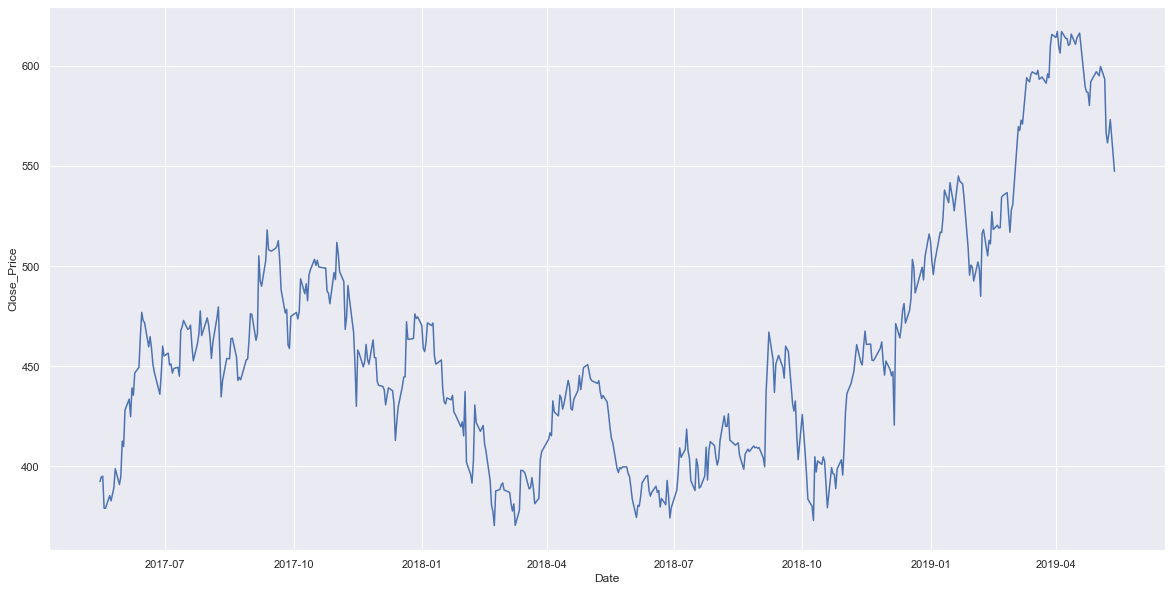

In [61]:
sns.lineplot(x="Date", y="Close_Price", data=df_close_price_per_day )

Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock
This would be helpful if we are to train our model to take NLP inputs.

In [62]:
dataframe['Day_Perc_Change'].sort_values().head()

Date
2018-02-02   -8.07
2018-12-06   -5.97
2018-10-19   -5.76
2018-09-24   -5.64
2017-08-10   -4.95
Name: Day_Perc_Change, dtype: float64

- 2018-12-06 - [Muthoot Finance Q2 profit rises 9% to Rs 484 cr, AUM grows 21](https://www.moneycontrol.com/news/business/earnings/muthoot-finance-q2-profit-rises-9-to-rs-484-cr-aum-grows-21-3260721.html)
- 2018-09-24 - [Asset-liability mismatch at comfortable level, says Muthoot Finance](https://www.cnbctv18.com/videos/finance/asset-liability-mismatch-at-comfortable-level-says-muthoot-finance-900111.htm)
- 2017-08-09 - [Kerala Goods and Services Tax Bill introduced in Assembly](https://timesofindia.indiatimes.com/business/india-business/kerala-goods-and-services-tax-bill-introduced-in-assembly/articleshow/59988338.cms)

In [63]:
dataframe['Day_Perc_Change'].sort_values().tail()

Date
2019-03-05     7.32
2017-09-06     8.34
2018-10-10     8.52
2018-09-05     9.24
2018-12-07    12.04
Name: Day_Perc_Change, dtype: float64

- 2018-12-07 - [Muthoot Finance will consider more fund raising via NCDs: George Alexander Muthoot](https://economictimes.indiatimes.com/markets/expert-view/muthoot-finance-will-now-look-at-more-fund-raising-through-ncd-route-george-alexander-muthoot/articleshow/66986536.cms)
- 2018-09-05 - [Muthoot Finance Q1 net profit rises 43% at ₹492 crore](https://www.thehindubusinessline.com/money-and-banking/muthoot-finance-q1-net-profit-rises-43-at-492-crore/article24874199.ece)



## 2.2 

A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

<StemContainer object of 3 artists>

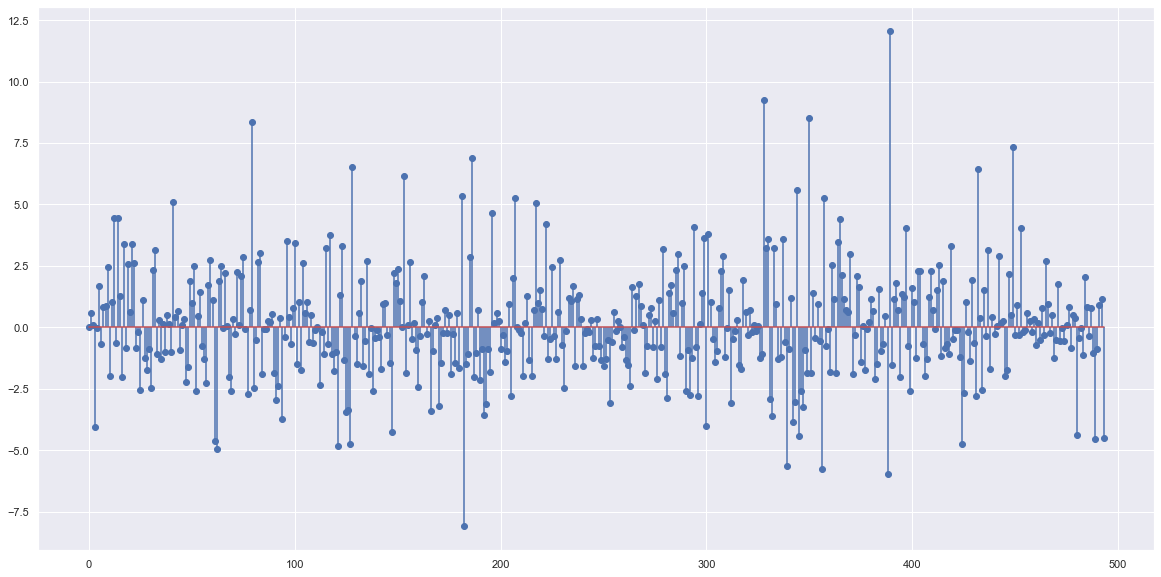

In [64]:
pyplot.stem(dataframe['Day_Perc_Change'], use_line_collection=True)

## 2.3 

Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 

Text(0, 0.5, 'Day_Perc_Change')

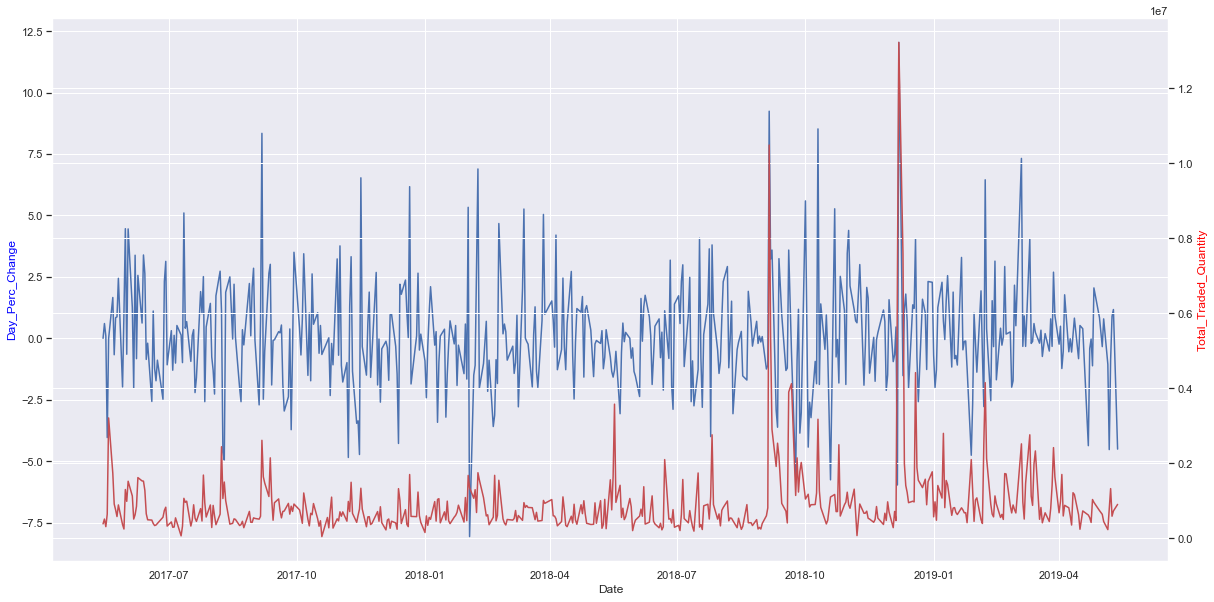

In [65]:
fig = pyplot.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax1.set_xlabel('Date')
ax2.set_ylabel('Total_Traded_Quantity', color='red')
ax2.plot(dataframe['Total_Traded_Quantity'], 'r-')

ax1.plot(dataframe['Day_Perc_Change'], 'b-')
ax1.set_ylabel('Day_Perc_Change', color='blue')

In [66]:
dataframe['Day_Perc_Change'].describe()

count    494.000000
mean       0.092449
std        2.247475
min       -8.070000
25%       -1.230000
50%       -0.060000
75%        1.117500
max       12.040000
Name: Day_Perc_Change, dtype: float64

Observations:
- Day_Perc_Change outside of 1 or 2 standard deviations corrilates with large spikes in Total_Traded_Quantity

## 2.4 

We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. 

In [67]:
trend_aggregation = dataframe.groupby('Trend').count()['Symbol']

In [68]:
trend_aggregation.index

Index(['Among top gainers', 'Among top losers', 'Bear drop', 'Bull run',
       'Negative', 'Positive', 'Slight', 'Slight negative', 'Slight positive'],
      dtype='object', name='Trend')

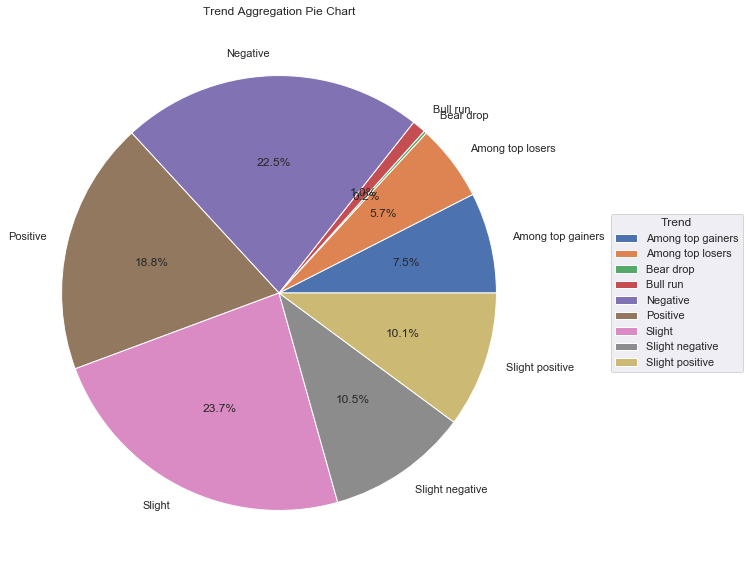

In [69]:
fig, ax = pyplot.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

ax.pie( trend_aggregation, labels=trend_aggregation.index, autopct='%1.1f%%' )

ax.set_title("Trend Aggregation Pie Chart")
ax.legend(trend_aggregation.index,
          title="Trend",
          loc="center left",
          bbox_to_anchor=(1.1, 0, 0.5, 1))

pyplot.show()

From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type. 

In [70]:
volume_by_trend = dataframe.groupby('Trend', as_index=False)['Total_Traded_Quantity']

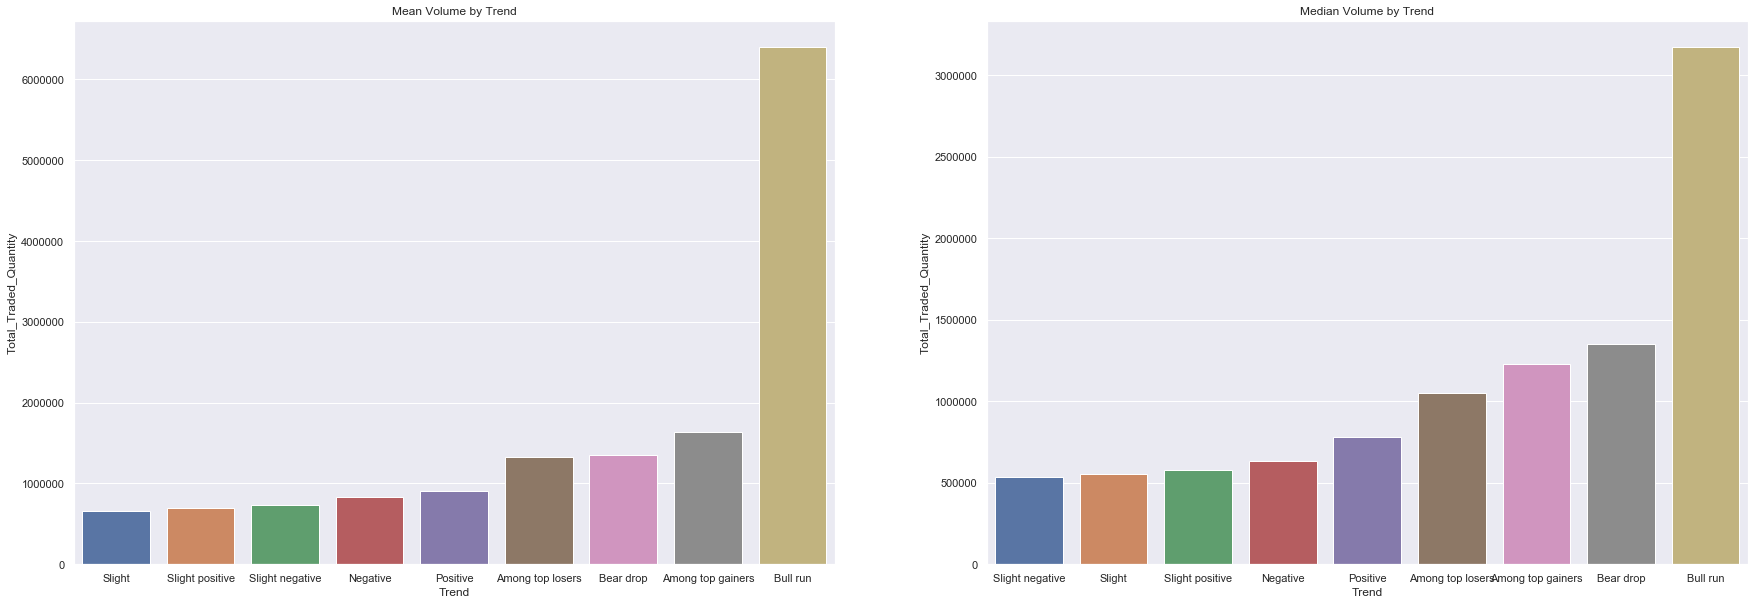

In [71]:
fig, axes = pyplot.subplots(figsize=(30, 10), nrows=1, ncols=2)

axes[0].set_title("Mean Volume by Trend")
sns.barplot(ax=axes[0], x='Trend', y='Total_Traded_Quantity', data=volume_by_trend.mean().sort_values('Total_Traded_Quantity'));

axes[1].set_title("Median Volume by Trend")
sns.barplot(ax=axes[1], x='Trend', y='Total_Traded_Quantity', data=volume_by_trend.median().sort_values('Total_Traded_Quantity'));

## 2.5 

Plot the daily return (percentage) distribution as a histogram.

Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

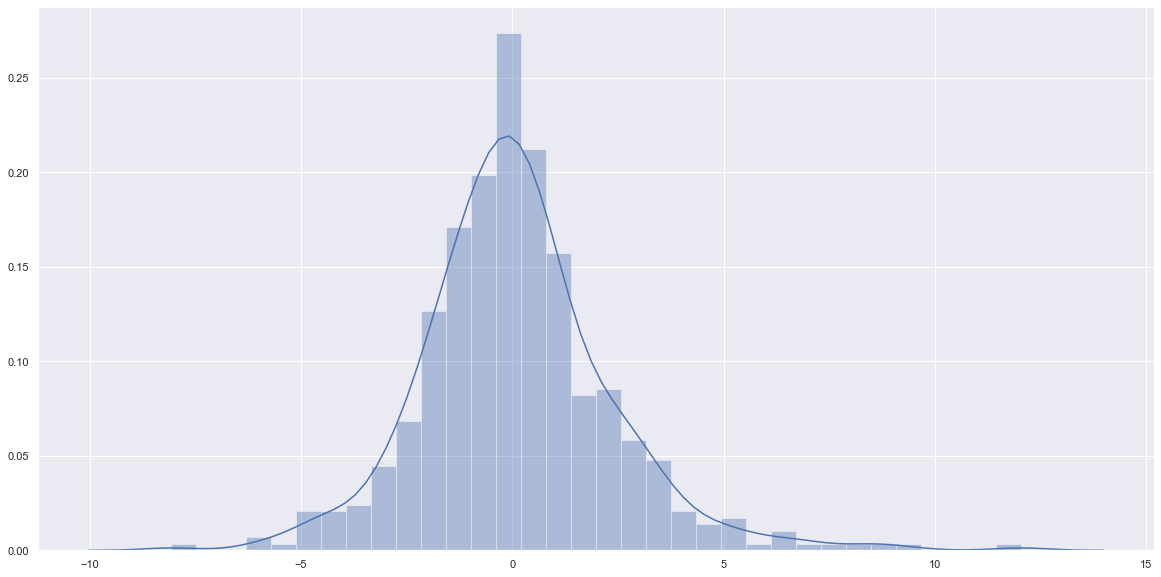

In [72]:
sns.distplot(dataframe['Day_Perc_Change'].tolist(), kde=True, rug=False);

## 2.6 

We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price. 

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. 



In [73]:
filenames = glob2.glob("../../data_output/module_1/typescript/stocks/Large_Cap/*.csv")[0:5]
filenames = { re.sub('.*/([A-Z]+)\.csv', '\\1', filename): filename for filename in filenames }
filenames

{'TITAN': '../../data_output/module_1/typescript/stocks/Large_Cap/TITAN.csv',
 'MARUTI': '../../data_output/module_1/typescript/stocks/Large_Cap/MARUTI.csv',
 'ASIANPAINT': '../../data_output/module_1/typescript/stocks/Large_Cap/ASIANPAINT.csv',
 'IOC': '../../data_output/module_1/typescript/stocks/Large_Cap/IOC.csv',
 'DRREDDY': '../../data_output/module_1/typescript/stocks/Large_Cap/DRREDDY.csv'}

In [74]:
def read_csv( filename ):
    dataframe = pd.read_csv(filename, parse_dates=['Date'])
    dataframe = dataframe[ dataframe['Series'] == 'EQ' ]
    dataframe.set_index('Date', inplace=True, drop=False)
    return dataframe
    
dataframes = { title: read_csv( filename ) for (title,filename) in filenames.items() }

In [92]:
correlation_df = pd.DataFrame(columns=dataframes.keys())
for (title,dataframe) in dataframes.items():
    correlation_df[title] = dataframe['Close_Price']
    
correlation_df.head()

,TITAN,MARUTI,ASIANPAINT,IOC,DRREDDY
Date,,,,,
2017-05-15,483.65,6823.90,1148.05,442.10,2675.80
2017-05-16,488.30,6953.95,1142.85,446.60,2724.10
2017-05-17,481.75,6958.20,1154.95,444.25,2736.90
2017-05-18,471.65,6831.05,1151.35,439.90,2678.95
2017-05-19,471.15,6790.55,1123.15,435.40,2656.45


Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.

In [87]:
correlation_df_pct = correlation_df.pct_change().dropna()
correlation_df_pct.head()

,TITAN,MARUTI,ASIANPAINT,IOC,DRREDDY
Date,,,,,
2017-05-16,0.009614,0.019058,-0.004529,0.010179,0.018051
2017-05-17,-0.013414,0.000611,0.010588,-0.005262,0.004699
2017-05-18,-0.020965,-0.018273,-0.003117,-0.009792,-0.021174
2017-05-19,-0.001060,-0.005929,-0.024493,-0.010230,-0.008399
2017-05-22,0.021755,-0.013084,-0.009438,-0.023082,-0.017975


Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on [correlation](https://www.investopedia.com/terms/c/correlation.asp) and [diversification](https://www.investopedia.com/terms/d/diversification.asp). 

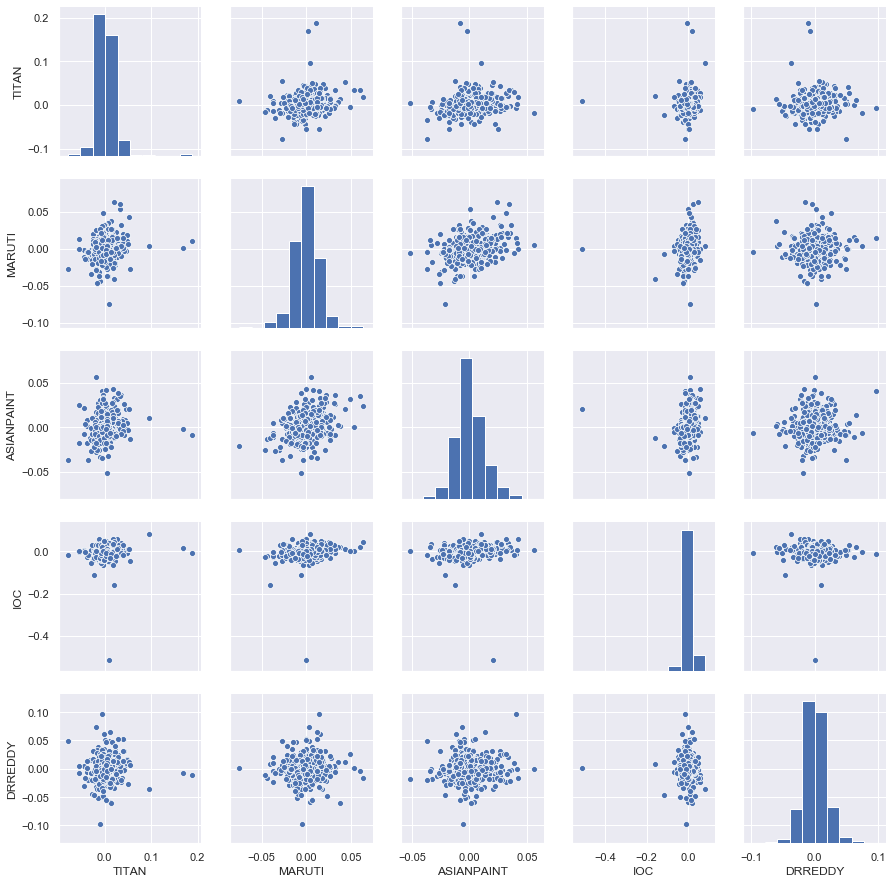

In [89]:
sns.pairplot(correlation_df_pct)

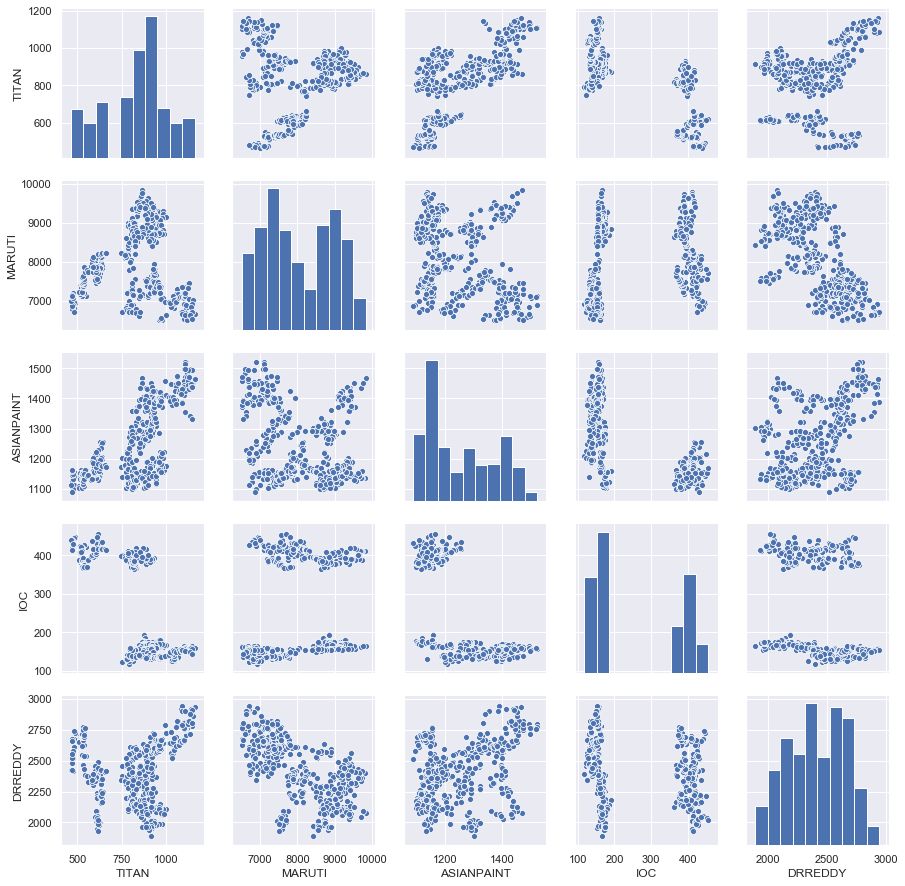

In [91]:
sns.pairplot(correlation_df)